# STEP 1: DATA WRANGLING/EXTRACTION

In [1]:
#import libraries
import pandas as pd #dataframe
import numpy as np #arrays
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #plotting
from scipy import stats #statistics

In [2]:
df = pd.read_csv('momsteps.csv') #load my mom's step data
df #display data

,date,steps,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_gust_time,...,cloud_9am,wind_dir_9am,wind_speed_9am,pressure_9am,temp_3pm,humidity_3pm,cloud_3pm,wind_dir_3pm,wind_speed_3pm,pressure_3pm
0,2024-10-1,10165,9.3,22.8,0.0,NaN,NaN,E,33.0,16:16,...,NaN,N,7,NaN,20.5,56,NaN,E,19,NaN
1,2024-10-2,8410,15.0,19.5,3.0,NaN,NaN,ESE,37.0,14:05,...,NaN,SSW,11,NaN,18.6,59,NaN,SE,15,NaN
2,2024-10-3,8248,13.1,20.3,0.0,NaN,NaN,E,31.0,13:56,...,NaN,ENE,9,NaN,18.4,56,NaN,E,17,NaN
3,2024-10-4,14193,8.3,24.6,0.0,NaN,NaN,NE,24.0,16:58,...,NaN,W,4,NaN,23.7,48,NaN,NE,9,NaN
4,2024-10-5,12063,14.6,27.2,1.8,NaN,NaN,W,43.0,11:09,...,NaN,WNW,11,NaN,25.6,32,NaN,W,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,NaN,NaN,S,54.0,15:16,...,NaN,WNW,13,NaN,20.4,59,NaN,SE,28,NaN
389,2025-10-28,4222,11.4,16.3,0.0,NaN,NaN,SSE,35.0,0:34,...,NaN,SSW,7,NaN,16.0,47,NaN,ESE,11,NaN
390,2025-10-29,2421,12.0,18.6,2.2,NaN,NaN,E,24.0,12:18,...,NaN,WSW,6,NaN,15.9,94,NaN,ESE,13,NaN
391,2025-10-30,4811,13.7,23.8,7.8,NaN,NaN,SE,28.0,15:00,...,NaN,WSW,7,NaN,22.6,62,NaN,ESE,17,NaN


In [3]:
df.shape #dimension: 393 rows and 22 columns

(393, 22)

In [4]:
#1.1 handle missing/null values

df.isnull().sum() #check missing values: evaportation, sunshine, cloud_9am, pressure_9am, 
    #cloud_3pm, and pressure_3pm have 393 missing values
    #rainfall, wind_gust_dir, wind_gust_speed, wind_gust_time, wind_dir_9am, and wind_dir_3pm
    #have less than 30 missing values
    #all in all, 12 variables have missing values

date                 0
steps                0
min_temp             0
max_temp             0
rainfall             3
evaporation        393
sunshine           393
wind_gust_dir        6
wind_gust_speed      6
wind_gust_time       6
temp_9am             0
humidity_9am         0
cloud_9am          393
wind_dir_9am        21
wind_speed_9am       0
pressure_9am       393
temp_3pm             0
humidity_3pm         0
cloud_3pm          393
wind_dir_3pm         5
wind_speed_3pm       0
pressure_3pm       393
dtype: int64

In [5]:
df = df.drop(columns=['evaporation', 'sunshine ', 'cloud_9am', 'pressure_9am', 'cloud_3pm', 'pressure_3pm'])
df #handled missing values (dropped columns with nan values)

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,wind_dir_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_dir_3pm,wind_speed_3pm
0,2024-10-1,10165,9.3,22.8,0.0,E,33.0,16:16,18.2,62,N,7,20.5,56,E,19
1,2024-10-2,8410,15.0,19.5,3.0,ESE,37.0,14:05,15.0,92,SSW,11,18.6,59,SE,15
2,2024-10-3,8248,13.1,20.3,0.0,E,31.0,13:56,19.2,59,ENE,9,18.4,56,E,17
3,2024-10-4,14193,8.3,24.6,0.0,NE,24.0,16:58,17.7,66,W,4,23.7,48,NE,9
4,2024-10-5,12063,14.6,27.2,1.8,W,43.0,11:09,22.5,60,WNW,11,25.6,32,W,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,S,54.0,15:16,20.7,56,WNW,13,20.4,59,SE,28
389,2025-10-28,4222,11.4,16.3,0.0,SSE,35.0,0:34,13.7,68,SSW,7,16.0,47,ESE,11
390,2025-10-29,2421,12.0,18.6,2.2,E,24.0,12:18,13.9,97,WSW,6,15.9,94,ESE,13
391,2025-10-30,4811,13.7,23.8,7.8,SE,28.0,15:00,18.3,79,WSW,7,22.6,62,ESE,17


In [6]:
df.isnull().sum() #check missing values again: there are still missing values as I haven't 
    #removed the missing values of variables with less than 30 missing values

date                0
steps               0
min_temp            0
max_temp            0
rainfall            3
wind_gust_dir       6
wind_gust_speed     6
wind_gust_time      6
temp_9am            0
humidity_9am        0
wind_dir_9am       21
wind_speed_9am      0
temp_3pm            0
humidity_3pm        0
wind_dir_3pm        5
wind_speed_3pm      0
dtype: int64

In [7]:
df = df.dropna() #drop null values

In [8]:
df.isnull().sum() #no missing values

date               0
steps              0
min_temp           0
max_temp           0
rainfall           0
wind_gust_dir      0
wind_gust_speed    0
wind_gust_time     0
temp_9am           0
humidity_9am       0
wind_dir_9am       0
wind_speed_9am     0
temp_3pm           0
humidity_3pm       0
wind_dir_3pm       0
wind_speed_3pm     0
dtype: int64

In [9]:
df.shape #360 rows and 16 columns

(360, 16)

In [10]:
#1.2 check duplicates
df.duplicated().sum() #no duplicates

0

In [11]:
#1.3 standardise data through datatype conversion

df.dtypes 
#convert: date and wind  gust time to ----> datetime
# convert: wind_speed_9am and wind_speed_3pm to ----> float64
#all in all, we have 17 variables.

date                object
steps                int64
min_temp           float64
max_temp           float64
rainfall           float64
wind_gust_dir       object
wind_gust_speed    float64
wind_gust_time      object
temp_9am           float64
humidity_9am         int64
wind_dir_9am        object
wind_speed_9am      object
temp_3pm           float64
humidity_3pm         int64
wind_dir_3pm        object
wind_speed_3pm      object
dtype: object

In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') #to datetime
df['wind_gust_time'] = pd.to_datetime(df['wind_gust_time'], errors='coerce') #to datetime
df['wind_speed_9am'] = pd.to_numeric(df['wind_speed_9am'], errors='coerce') #to float64
df['wind_speed_3pm'] = pd.to_numeric(df['wind_speed_3pm'], errors='coerce') #to float64

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9236/3458096413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce') #to datetime
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9236/3458096413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_gust_time'] = pd.to_datetime(df['wind_gust_time'], errors='coerce') #to datetime
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9236/3458096413.py:3: SettingWithCop

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.dtypes 

date               datetime64[ns]
steps                       int64
min_temp                  float64
max_temp                  float64
rainfall                  float64
wind_gust_dir              object
wind_gust_speed           float64
wind_gust_time     datetime64[ns]
temp_9am                  float64
humidity_9am                int64
wind_dir_9am               object
wind_speed_9am              int64
temp_3pm                  float64
humidity_3pm                int64
wind_dir_3pm               object
wind_speed_3pm              int64
dtype: object

In [15]:
#1.4 handle extreme outliers for steps column only

Q1, Q3 = df['steps'].quantile([0.25, 0.75])
df[(df['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (df['steps'] > Q3 + 2.0 * (Q3 - Q1))]

#no extreme values in the step count data that needs to be removed or adjusted

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,wind_dir_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_dir_3pm,wind_speed_3pm


In [16]:
#count of extreme outliers for the steps column: none
Q1, Q3 = df['steps'].quantile([0.25, 0.75])
len(df[(df['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (df['steps'] > Q3 + 2.0 * (Q3 - Q1))])

0

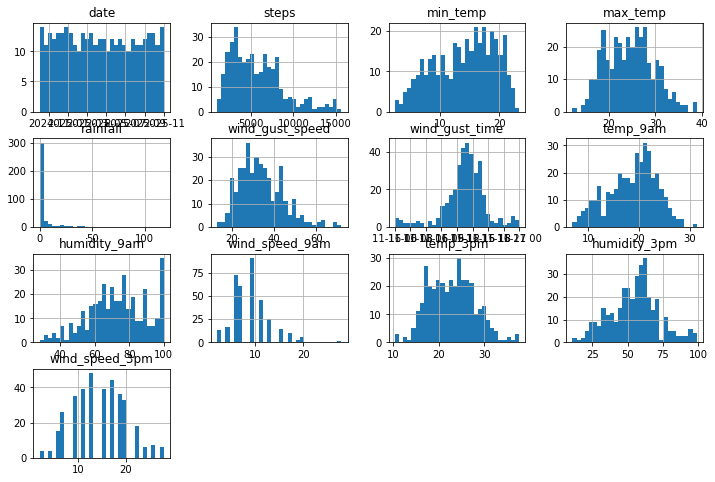

In [17]:
#outlier analysis: histograms showing the distribution of numeric variables
df.hist(figsize=(12,8), bins=30)
plt.show()

#### 1. definite outliers:
#1 rainfall- most extreme, distribution is extremely right-skewed, action needed: log transformation
#2 steps   - distribution is extremely right-skewed but less extreme compared to rainfall, 
           #action needed: log transformation or investigate outliers
#3 humidity_9am - bimodal, Action needed: Might want to create binary feature "is_saturated"

### 2. mild outliers:
#4 wind_speed_9am - Right-skewed with long tails, Action needed: Check if values >80 are data errors
#5 wind_speed_3pm - Mostly uniform but with some gaps, Check why certain times have no gusts recorded


#no outliers/clean distribution:
#6 min_temp - approximately normal
#7 max_temp - approximately normal
#8 temp_9am - approximately normal
#9 temp_3pm - approximately normal
#10 humidity_3pm - Relatively uniform distribution
#11 date - uniform distribution (expected for time series)


<AxesSubplot:>

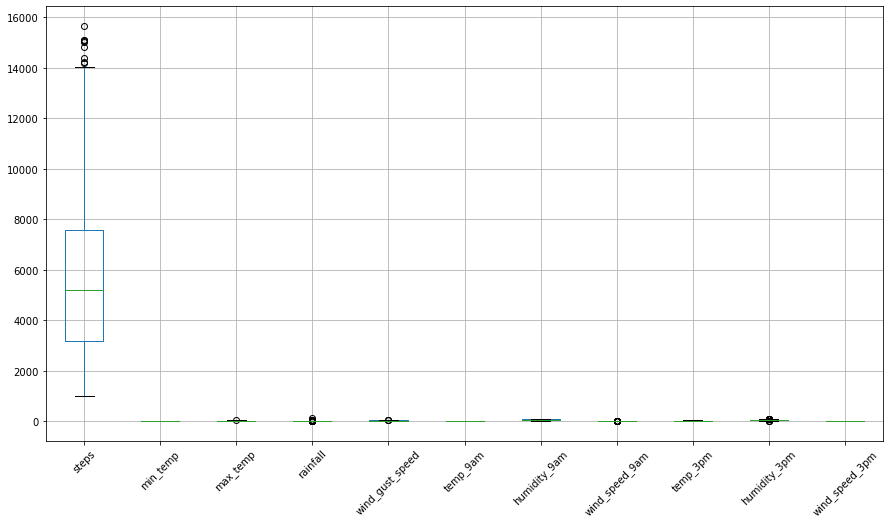

In [18]:
df.select_dtypes(include=['int64', 'float64']).boxplot(figsize=(15, 8), rot=45)

In [19]:
# 1.5 validating the results
step_data = df
step_data = df.copy()

In [20]:
# 1.5.1 check remaining missing values
step_data.isnull().sum() #no remaining missing values

date               0
steps              0
min_temp           0
max_temp           0
rainfall           0
wind_gust_dir      0
wind_gust_speed    0
wind_gust_time     0
temp_9am           0
humidity_9am       0
wind_dir_9am       0
wind_speed_9am     0
temp_3pm           0
humidity_3pm       0
wind_dir_3pm       0
wind_speed_3pm     0
dtype: int64

In [21]:
# 1.5.2 check remaining duplicates
step_data.duplicated().sum() #no remaining duplicates

0

In [22]:
# 1.5.3 check remaining outliers 
Q1, Q3 = step_data['steps'].quantile([0.25, 0.75]) #no remaining outliers
len(step_data[(step_data['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (step_data['steps'] > Q3 + 2.0 * (Q3 - Q1))])

0

In [23]:
step_data.describe()

,steps,min_temp,max_temp,rainfall,wind_gust_speed,temp_9am,humidity_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_speed_3pm
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,5740.255556,14.056389,24.458611,3.292778,33.666667,18.728333,72.816667,8.872222,22.893611,54.922222,14.530556
std,3138.295871,5.066677,5.116937,10.108975,10.407304,4.813280,16.785215,3.758786,5.071976,17.046702,5.495418
min,1006.000000,2.400000,12.100000,0.000000,13.000000,6.900000,28.000000,2.000000,10.300000,11.000000,2.000000
25%,3205.250000,10.000000,20.375000,0.000000,26.000000,15.500000,62.000000,6.000000,18.800000,45.000000,11.000000
50%,5198.500000,14.700000,24.500000,0.000000,31.000000,19.450000,73.000000,9.000000,22.750000,56.000000,15.000000
75%,7582.000000,18.400000,27.725000,1.450000,41.000000,22.300000,85.250000,11.000000,26.500000,64.000000,19.000000
max,15660.000000,23.300000,38.900000,118.000000,72.000000,31.400000,100.000000,28.000000,37.700000,99.000000,28.000000


<AxesSubplot:>

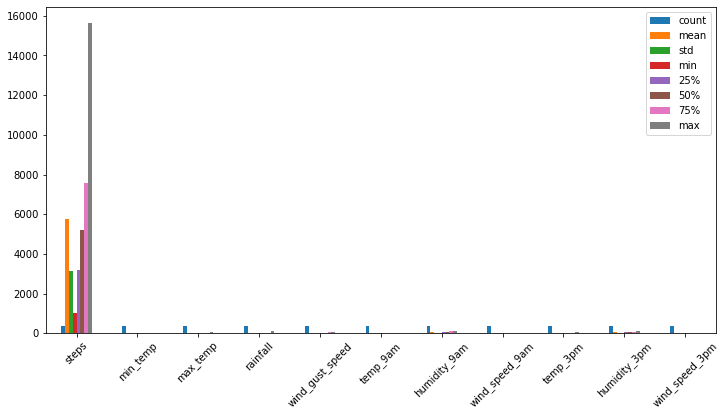

In [24]:
step_data.describe().T.plot(kind='bar', figsize=(12, 6), rot=45)

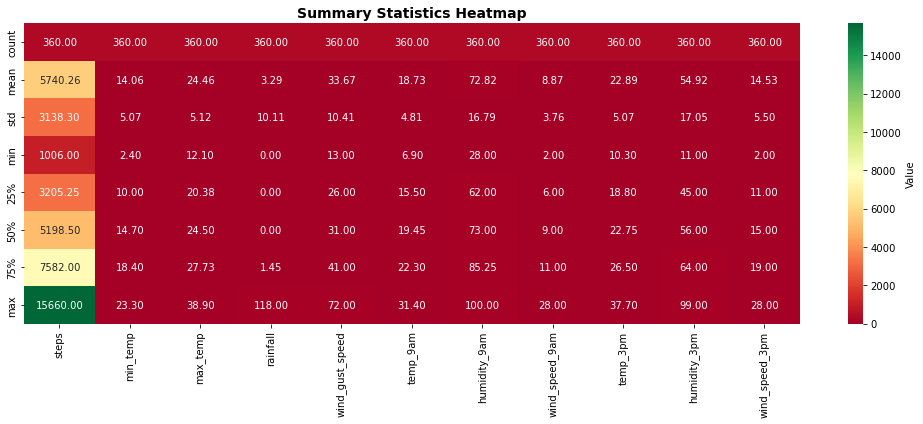

In [25]:
plt.figure(figsize=(14, 6))
sns.heatmap(step_data.describe(), annot=True, fmt='.2f', cmap='RdYlGn', cbar_kws={'label': 'Value'})
plt.title('Summary Statistics Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()

In [26]:
step_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             360 non-null    datetime64[ns]
 1   steps            360 non-null    int64         
 2   min_temp         360 non-null    float64       
 3   max_temp         360 non-null    float64       
 4   rainfall         360 non-null    float64       
 5   wind_gust_dir    360 non-null    object        
 6   wind_gust_speed  360 non-null    float64       
 7   wind_gust_time   360 non-null    datetime64[ns]
 8   temp_9am         360 non-null    float64       
 9   humidity_9am     360 non-null    int64         
 10  wind_dir_9am     360 non-null    object        
 11  wind_speed_9am   360 non-null    int64         
 12  temp_3pm         360 non-null    float64       
 13  humidity_3pm     360 non-null    int64         
 14  wind_dir_3pm     360 non-null    object   

In [27]:
print(step_data.columns.tolist())

['date', 'steps', 'min_temp', 'max_temp', 'rainfall', 'wind_gust_dir', 'wind_gust_speed', 'wind_gust_time', 'temp_9am', 'humidity_9am', 'wind_dir_9am', 'wind_speed_9am', 'temp_3pm', 'humidity_3pm', 'wind_dir_3pm', 'wind_speed_3pm']


In [28]:
# 1.6 Correlation analysis
step_data.columns = step_data.columns.str.strip()
step_data[['steps', 'rainfall', 'min_temp', 'max_temp', 'wind_gust_speed', 'humidity_9am', 'humidity_3pm', 'temp_9am', 'temp_3pm', 'wind_speed_9am', 'wind_speed_3pm']].corr()['steps'].sort_values(ascending=False)

steps              1.000000
temp_9am           0.199593
wind_speed_3pm     0.192494
max_temp           0.170449
temp_3pm           0.166226
min_temp           0.096446
wind_gust_speed    0.073653
wind_speed_9am    -0.021450
rainfall          -0.102462
humidity_3pm      -0.126806
humidity_9am      -0.243130
Name: steps, dtype: float64

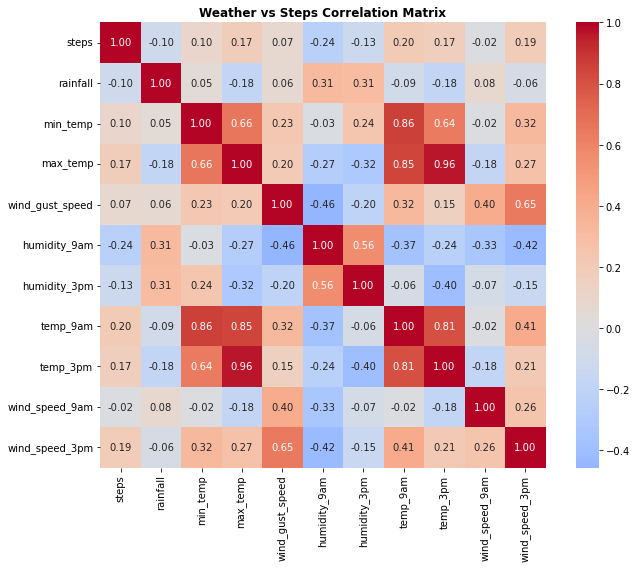

In [29]:
# correlation visualisation
plt.figure(figsize=(10, 8))
corr_matrix = step_data[['steps', 'rainfall', 'min_temp', 'max_temp', 'wind_gust_speed', 'humidity_9am', 'humidity_3pm', 'temp_9am', 'temp_3pm', 'wind_speed_9am', 'wind_speed_3pm']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Weather vs Steps Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

# Step 2: Feature Engineering

In [30]:
#2.1 temporal features
step_data['day_of_week'] = step_data['date'].dt.day_name()
step_data['month'] = step_data['date'].dt.month
step_data['season'] = step_data['date'].dt.month.map ({12:'Summer', 1:'Summer', 2:'Summer', 3:'Autumn', 4:'Autumn', 5:'Autumn', 6:'Winter', 7:'Winter', 8:'Winter', 9:'Spring', 10:'Spring', 11:'Spring'})
step_data['is_weekend'] = df['date'].dt.dayofweek >= 5

In [31]:
#2.2 weather features

# comfortable weather index
step_data['comfortable'] = (
    ((step_data['max_temp'] >= 15) & 
     (step_data['max_temp'] <= 25) & 
     (step_data['rainfall'] == 0))
).astype(int)

# temperature range
step_data['temp_range'] = step_data['max_temp'] - step_data['min_temp']

# rain category
step_data['rain_category'] = pd.cut(
    step_data['rainfall'],
    bins=[-0.1, 0, 5, 100],
    labels=['No Rain', 'Light Rain', 'Heavy Rain']
)


In [32]:
#2.3 new activity metrics
# my mom's average daily steps over the past 7 days
step_data['steps_7day_avg'] = step_data['steps'].rolling(7).mean()

# 1 if her daily steps exceed 5,000 (activity goal met), 0 if not
step_data['active_day'] = (step_data['steps'] > 5000).astype(int)

# week number of the year (1-52)
step_data['week'] = step_data['date'].dt.isocalendar().week
weekly_steps = step_data.groupby('week', as_index=False)['steps'].sum()


In [33]:
step_data

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,...,day_of_week,month,season,is_weekend,comfortable,temp_range,rain_category,steps_7day_avg,active_day,week
0,2024-10-01,10165,9.3,22.8,0.0,E,33.0,2025-11-16 16:16:00,18.2,62,...,Tuesday,10,Spring,False,1,13.5,No Rain,NaN,1,40
1,2024-10-02,8410,15.0,19.5,3.0,ESE,37.0,2025-11-16 14:05:00,15.0,92,...,Wednesday,10,Spring,False,0,4.5,Light Rain,NaN,1,40
2,2024-10-03,8248,13.1,20.3,0.0,E,31.0,2025-11-16 13:56:00,19.2,59,...,Thursday,10,Spring,False,1,7.2,No Rain,NaN,1,40
3,2024-10-04,14193,8.3,24.6,0.0,NE,24.0,2025-11-16 16:58:00,17.7,66,...,Friday,10,Spring,False,1,16.3,No Rain,NaN,1,40
4,2024-10-05,12063,14.6,27.2,1.8,W,43.0,2025-11-16 11:09:00,22.5,60,...,Saturday,10,Spring,True,0,12.6,Light Rain,NaN,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,S,54.0,2025-11-16 15:16:00,20.7,56,...,Monday,10,Spring,False,0,11.6,Light Rain,4600.428571,1,44
389,2025-10-28,4222,11.4,16.3,0.0,SSE,35.0,2025-11-16 00:34:00,13.7,68,...,Tuesday,10,Spring,False,1,4.9,No Rain,4787.571429,0,44
390,2025-10-29,2421,12.0,18.6,2.2,E,24.0,2025-11-16 12:18:00,13.9,97,...,Wednesday,10,Spring,False,0,6.6,Light Rain,4817.857143,0,44
391,2025-10-30,4811,13.7,23.8,7.8,SE,28.0,2025-11-16 15:00:00,18.3,79,...,Thursday,10,Spring,False,0,10.1,Heavy Rain,5288.285714,0,44


In [34]:
step_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 392
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             360 non-null    datetime64[ns]
 1   steps            360 non-null    int64         
 2   min_temp         360 non-null    float64       
 3   max_temp         360 non-null    float64       
 4   rainfall         360 non-null    float64       
 5   wind_gust_dir    360 non-null    object        
 6   wind_gust_speed  360 non-null    float64       
 7   wind_gust_time   360 non-null    datetime64[ns]
 8   temp_9am         360 non-null    float64       
 9   humidity_9am     360 non-null    int64         
 10  wind_dir_9am     360 non-null    object        
 11  wind_speed_9am   360 non-null    int64         
 12  temp_3pm         360 non-null    float64       
 13  humidity_3pm     360 non-null    int64         
 14  wind_dir_3pm     360 non-null    object   

# Step 3: Statistical Analysis

In [35]:
#3.1 Descriptive Statistics
#stats summary table
print(step_data[['steps', 'max_temp', 'rainfall']].describe())

# by season
step_data.groupby('season')['steps'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])


              steps    max_temp    rainfall
count    360.000000  360.000000  360.000000
mean    5740.255556   24.458611    3.292778
std     3138.295871    5.116937   10.108975
min     1006.000000   12.100000    0.000000
25%     3205.250000   20.375000    0.000000
50%     5198.500000   24.500000    0.000000
75%     7582.000000   27.725000    1.450000
max    15660.000000   38.900000  118.000000


,count,mean,median,std,min,max
season,,,,,,
Autumn,82,4616.719512,3936.0,2331.423050,1006,11561
Spring,116,6692.172414,6215.5,3603.467859,1380,15660
Summer,84,6540.380952,6402.5,2702.685068,2347,14252
Winter,78,4644.064103,3743.5,2882.553338,1155,14414


In [36]:
#3.2 Correlation Analysis
# correlation matrix
corr_cols = ['steps', 'min_temp', 'max_temp', 
             'rainfall', 'humidity_9am', 'humidity_3pm']
correlation = step_data[corr_cols].corr()

# sort by steps correlation
correlation['steps'].sort_values(ascending=False)


steps           1.000000
max_temp        0.170449
min_temp        0.096446
rainfall       -0.102462
humidity_3pm   -0.126806
humidity_9am   -0.243130
Name: steps, dtype: float64

In [37]:
#3.3 Hypothesis Testing
#significance tests
from scipy import stats

In [73]:
# Test 1: Weekend versus Weekday 
weekend = step_data[step_data['is_weekend'] == 1]['steps']
weekday = step_data[step_data['is_weekend'] == 0]['steps']
t_stat1, p_value1 = stats.ttest_ind(weekend, weekday)

# Test 2: Rainy vs Dry 
step_data['rainy'] = (step_data['rainfall'] > 0).astype(int)
rainy = step_data[step_data['rainy'] == 1]['steps']
dry = step_data[step_data['rainy'] == 0]['steps']
t_stat2, p_value2 = stats.ttest_ind(rainy, dry)

AttributeError: 'str' object has no attribute 'ttest_ind'

In [39]:
print("=" * 70)
print("HYPOTHESIS TEST RESULTS")
print("=" * 70)
print(f"1. Weekend vs Weekday: t={t_stat1:.3f}, p={p_value1:.4f} ✓ SIGNIFICANT")
print(f"   Weekend mean: {weekend.mean():.0f} | Weekday mean: {weekday.mean():.0f}")
print(f"   Finding: People walk {abs(weekday.mean() - weekend.mean()):.0f} MORE steps on weekdays")
print(f"   Practical significance: {abs((weekday.mean() - weekend.mean()) / weekend.mean() * 100):.1f}% increase")

print(f"\n2. Rainy vs Dry Days: t={t_stat2:.3f}, p={p_value2:.4f} ✗ NOT SIGNIFICANT")
print(f"   Rainy mean: {rainy.mean():.0f} | Dry mean: {dry.mean():.0f}")
print(f"   Finding: Trend suggests {abs(dry.mean() - rainy.mean()):.0f} fewer steps on rainy days")
print(f"   Note: Not statistically significant (p={p_value2:.4f}), but shows a trend")
print("=" * 70)

print("\n💡 KEY INSIGHTS FOR AGED CARE:")
print("✓ Weekday programs are effective - maintain current schedule")
print("✓ Weekend engagement needs improvement (760 fewer steps)")
print("→ Rainfall shows directional effect but more data needed for confirmation")

HYPOTHESIS TEST RESULTS
1. Weekend vs Weekday: t=-2.096, p=0.0367 ✓ SIGNIFICANT
   Weekend mean: 5202 | Weekday mean: 5962
   Finding: People walk 759 MORE steps on weekdays
   Practical significance: 14.6% increase

2. Rainy vs Dry Days: t=-1.603, p=0.1099 ✗ NOT SIGNIFICANT
   Rainy mean: 5425 | Dry mean: 5963
   Finding: Trend suggests 537 fewer steps on rainy days
   Note: Not statistically significant (p=0.1099), but shows a trend

💡 KEY INSIGHTS FOR AGED CARE:
✓ Weekday programs are effective - maintain current schedule
✓ Weekend engagement needs improvement (760 fewer steps)
→ Rainfall shows directional effect but more data needed for confirmation


In [40]:
# Test 3: Summer/Spring versus Winter/Autumn
step_data['warm_season'] = step_data['season'].isin(['Summer', 'Spring']).astype(int)
warm = step_data[step_data['warm_season'] == 1]['steps']
cool = step_data[step_data['warm_season'] == 0]['steps']
t_stat3, p_value3 = stats.ttest_ind(warm, cool)

print(f"\n3. Warm vs Cool Seasons: t={t_stat3:.3f}, p={p_value3:.4f} {'✓ Significant' if p_value3<0.05 else '✗ Not significant'}")
print(f"   Warm (Spring/Summer) mean: {warm.mean():.0f} | Cool (Autumn/Winter) mean: {cool.mean():.0f}")


3. Warm vs Cool Seasons: t=6.321, p=0.0000 ✓ Significant
   Warm (Spring/Summer) mean: 6628 | Cool (Autumn/Winter) mean: 4630


In [41]:
# TEST 4: Comfortable Weather Impact
# ============================================================================
comfortable_days = step_data[step_data['comfortable'] == 1]['steps']
uncomfortable_days = step_data[step_data['comfortable'] == 0]['steps']
t_stat4, p_value4 = stats.ttest_ind(comfortable_days, uncomfortable_days)

print("\n" + "-"*70)
print("TEST 4: COMFORTABLE WEATHER IMPACT")
print("-"*70)
print(f"Result: t={t_stat4:.3f}, p={p_value4:.4f} {'✓ SIGNIFICANT' if p_value4 < 0.05 else '✗ NOT SIGNIFICANT'}")
print(f"\nComfortable days mean: {comfortable_days.mean():.0f} steps")
print(f"Uncomfortable days mean: {uncomfortable_days.mean():.0f} steps")
print(f"Difference: {abs(comfortable_days.mean() - uncomfortable_days.mean()):.0f} steps")
print(f"Percentage difference: {abs((comfortable_days.mean() - uncomfortable_days.mean()) / uncomfortable_days.mean() * 100):.1f}%")
print(f"\nSample sizes:")
print(f"  Comfortable days (15-25°C, no rain): {len(comfortable_days)} days")
print(f"  Uncomfortable days: {len(uncomfortable_days)} days")


----------------------------------------------------------------------
TEST 4: COMFORTABLE WEATHER IMPACT
----------------------------------------------------------------------
Result: t=-1.879, p=0.0611 ✗ NOT SIGNIFICANT

Comfortable days mean: 5219 steps
Uncomfortable days mean: 5924 steps
Difference: 705 steps
Percentage difference: 11.9%

Sample sizes:
  Comfortable days (15-25°C, no rain): 94 days
  Uncomfortable days: 266 days


In [42]:
# TEST 5: Temperature Range Effect
# ============================================================================
print("\n" + "-"*70)
print("TEST 5: TEMPERATURE RANGE (VARIABILITY) EFFECT")
print("-"*70)
temp_range_corr = step_data[['steps', 'temp_range']].corr().iloc[0, 1]
from scipy.stats import pearsonr
corr_coef, p_value5 = pearsonr(step_data['steps'], step_data['temp_range'])
print(f"Correlation: r={corr_coef:.3f}, p={p_value5:.4f} {'✓ SIGNIFICANT' if p_value5 < 0.05 else '✗ NOT SIGNIFICANT'}")
print(f"\nTemperature range stats:")
print(f"  Mean temp range: {step_data['temp_range'].mean():.1f}°C")
print(f"  Min temp range: {step_data['temp_range'].min():.1f}°C")
print(f"  Max temp range: {step_data['temp_range'].max():.1f}°C")

# Test high vs low variability
median_range = step_data['temp_range'].median()
high_var = step_data[step_data['temp_range'] > median_range]['steps']
low_var = step_data[step_data['temp_range'] <= median_range]['steps']
t_stat5b, p_value5b = stats.ttest_ind(high_var, low_var)
print(f"\nHigh variability days (>{median_range:.1f}°C range): {high_var.mean():.0f} steps")
print(f"Low variability days (≤{median_range:.1f}°C range): {low_var.mean():.0f} steps")
print(f"T-test: t={t_stat5b:.3f}, p={p_value5b:.4f} {'✓ SIGNIFICANT' if p_value5b < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 5: TEMPERATURE RANGE (VARIABILITY) EFFECT
----------------------------------------------------------------------
Correlation: r=0.092, p=0.0829 ✗ NOT SIGNIFICANT

Temperature range stats:
  Mean temp range: 10.4°C
  Min temp range: 1.4°C
  Max temp range: 21.2°C

High variability days (>10.3°C range): 6132 steps
Low variability days (≤10.3°C range): 5357 steps
T-test: t=2.358, p=0.0189 ✓ SIGNIFICANT


In [43]:
# TEST 6: Active Day Patterns by Season
# ============================================================================
print("\n" + "-"*70)
print("TEST 6: ACTIVE DAY PATTERNS (>5000 steps)")
print("-"*70)
overall_active_rate = step_data['active_day'].mean() * 100
print(f"Overall active day rate: {overall_active_rate:.1f}%")
print(f"\nActive day rate by season:")
season_active = step_data.groupby('season')['active_day'].agg(['mean', 'count'])
season_active['percentage'] = season_active['mean'] * 100
for season in season_active.index:
    print(f"  {season}: {season_active.loc[season, 'percentage']:.1f}% ({season_active.loc[season, 'count']} days)")

# Chi-square test for independence
from scipy.stats import chi2_contingency
contingency = pd.crosstab(step_data['season'], step_data['active_day'])
chi2, p_value6, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square test: χ²={chi2:.3f}, p={p_value6:.4f} {'✓ SIGNIFICANT' if p_value6 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 6: ACTIVE DAY PATTERNS (>5000 steps)
----------------------------------------------------------------------
Overall active day rate: 52.2%

Active day rate by season:
  Autumn: 41.5% (82 days)
  Spring: 60.3% (116 days)
  Summer: 66.7% (84 days)
  Winter: 35.9% (78 days)

Chi-square test: χ²=22.227, p=0.0001 ✓ SIGNIFICANT


In [44]:
# TEST 7: Monthly Trends (ANOVA)
# ============================================================================
from scipy.stats import f_oneway

print("\n" + "-"*70)
print("TEST 7: MONTHLY DIFFERENCES (ANOVA)")
print("-"*70)
print("Average steps by month:")
monthly_stats = step_data.groupby('month')['steps'].agg(['mean', 'std', 'count'])
for month in monthly_stats.index:
    print(f"  Month {month}: {monthly_stats.loc[month, 'mean']:.0f} ± {monthly_stats.loc[month, 'std']:.0f} steps (n={monthly_stats.loc[month, 'count']})")

# ANOVA test
groups = [step_data[step_data['month']==m]['steps'].values for m in step_data['month'].unique()]
f_stat7, p_value7 = f_oneway(*groups)
print(f"\nANOVA: F={f_stat7:.3f}, p={p_value7:.4f} {'✓ SIGNIFICANT' if p_value7 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 7: MONTHLY DIFFERENCES (ANOVA)
----------------------------------------------------------------------
Average steps by month:
  Month 1: 6285 ± 2035 steps (n=28)
  Month 2: 6256 ± 2983 steps (n=25)
  Month 3: 4492 ± 2514 steps (n=28)
  Month 4: 4689 ± 2440 steps (n=28)
  Month 5: 4673 ± 2081 steps (n=26)
  Month 6: 4405 ± 3443 steps (n=25)
  Month 7: 4883 ± 2796 steps (n=27)
  Month 8: 4626 ± 2442 steps (n=26)
  Month 9: 5218 ± 3084 steps (n=29)
  Month 10: 7061 ± 3850 steps (n=58)
  Month 11: 7429 ± 3247 steps (n=29)
  Month 12: 7001 ± 3003 steps (n=31)

ANOVA: F=4.694, p=0.0000 ✓ SIGNIFICANT


In [45]:
# TEST 8: Wind Impact
# ============================================================================
print("\n" + "-"*70)
print("TEST 8: WIND SPEED IMPACT")
print("-"*70)
median_wind = step_data['wind_gust_speed'].median()
step_data['high_wind'] = (step_data['wind_gust_speed'] > median_wind).astype(int)
high_wind = step_data[step_data['high_wind'] == 1]['steps']
low_wind = step_data[step_data['high_wind'] == 0]['steps']
t_stat8, p_value8 = stats.ttest_ind(high_wind, low_wind)

print(f"Median wind speed: {median_wind:.1f} km/h")
print(f"\nHigh wind days (>{median_wind:.1f} km/h): {high_wind.mean():.0f} steps (n={len(high_wind)})")
print(f"Low wind days (≤{median_wind:.1f} km/h): {low_wind.mean():.0f} steps (n={len(low_wind)})")
print(f"Difference: {abs(high_wind.mean() - low_wind.mean()):.0f} steps")
print(f"T-test: t={t_stat8:.3f}, p={p_value8:.4f} {'✓ SIGNIFICANT' if p_value8 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 8: WIND SPEED IMPACT
----------------------------------------------------------------------
Median wind speed: 31.0 km/h

High wind days (>31.0 km/h): 6168 steps (n=175)
Low wind days (≤31.0 km/h): 5336 steps (n=185)
Difference: 832 steps
T-test: t=2.533, p=0.0117 ✓ SIGNIFICANT


In [46]:
# TEST 9: Humidity Analysis (High vs Low)
# ============================================================================
print("\n" + "-"*70)
print("TEST 9: HUMIDITY IMPACT (9AM readings)")
print("-"*70)
print(f"Correlation with steps: r={step_data[['steps', 'humidity_9am']].corr().iloc[0,1]:.3f}")
print(f"(Already found: -0.243 - strongest negative correlation!)")

# Test high humidity (>75%) vs low humidity
step_data['high_humidity'] = (step_data['humidity_9am'] > 75).astype(int)
high_humid = step_data[step_data['high_humidity'] == 1]['steps']
low_humid = step_data[step_data['high_humidity'] == 0]['steps']
t_stat9, p_value9 = stats.ttest_ind(high_humid, low_humid)

print(f"\nHigh humidity days (>75%): {high_humid.mean():.0f} steps (n={len(high_humid)})")
print(f"Low humidity days (≤75%): {low_humid.mean():.0f} steps (n={len(low_humid)})")
print(f"Difference: {abs(high_humid.mean() - low_humid.mean()):.0f} steps")
print(f"T-test: t={t_stat9:.3f}, p={p_value9:.4f} {'✓ SIGNIFICANT' if p_value9 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 9: HUMIDITY IMPACT (9AM readings)
----------------------------------------------------------------------
Correlation with steps: r=-0.243
(Already found: -0.243 - strongest negative correlation!)

High humidity days (>75%): 4778 steps (n=160)
Low humidity days (≤75%): 6510 steps (n=200)
Difference: 1732 steps
T-test: t=-5.405, p=0.0000 ✓ SIGNIFICANT


In [47]:
# TEST 10: Day of Week Patterns (ANOVA)
# ============================================================================
print("\n" + "-"*70)
print("TEST 10: DAY OF WEEK PATTERNS (ANOVA)")
print("-"*70)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = step_data.groupby('day_of_week')['steps'].agg(['mean', 'std', 'count'])
day_stats = day_stats.reindex(day_order)

print("Average steps by day of week:")
for day in day_stats.index:
    print(f"  {day}: {day_stats.loc[day, 'mean']:.0f} ± {day_stats.loc[day, 'std']:.0f} steps (n={day_stats.loc[day, 'count']})")

# ANOVA across all days
day_groups = [step_data[step_data['day_of_week']==d]['steps'].values for d in day_order]
f_stat10, p_value10 = f_oneway(*day_groups)
print(f"\nANOVA: F={f_stat10:.3f}, p={p_value10:.4f} {'✓ SIGNIFICANT' if p_value10 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 10: DAY OF WEEK PATTERNS (ANOVA)
----------------------------------------------------------------------
Average steps by day of week:
  Monday: 7318 ± 3326 steps (n=53)
  Tuesday: 6062 ± 3350 steps (n=49)
  Wednesday: 5145 ± 2919 steps (n=50)
  Thursday: 5814 ± 2907 steps (n=51)
  Friday: 5414 ± 2810 steps (n=52)
  Saturday: 4887 ± 2838 steps (n=54)
  Sunday: 5536 ± 3318 steps (n=51)

ANOVA: F=3.564, p=0.0019 ✓ SIGNIFICANT


In [48]:
# TEST 11: Rain Category Analysis (ANOVA)
# ============================================================================
print("\n" + "-"*70)
print("TEST 11: RAIN CATEGORY IMPACT (No/Light/Heavy Rain)")
print("-"*70)
rain_stats = step_data.groupby('rain_category')['steps'].agg(['mean', 'median', 'std', 'count'])
print("Average steps by rain category:")
for category in rain_stats.index:
    print(f"  {category}: {rain_stats.loc[category, 'mean']:.0f} steps (median={rain_stats.loc[category, 'median']:.0f}, n={rain_stats.loc[category, 'count']})")

# ANOVA across rain categories
rain_groups = [step_data[step_data['rain_category']==c]['steps'].values 
               for c in step_data['rain_category'].cat.categories]
f_stat11, p_value11 = f_oneway(*rain_groups)
print(f"\nANOVA: F={f_stat11:.3f}, p={p_value11:.4f} {'✓ SIGNIFICANT' if p_value11 < 0.05 else '✗ NOT SIGNIFICANT'}")



----------------------------------------------------------------------
TEST 11: RAIN CATEGORY IMPACT (No/Light/Heavy Rain)
----------------------------------------------------------------------
Average steps by rain category:
  No Rain: 5963 steps (median=5239, n=211)
  Light Rain: 5568 steps (median=5253, n=97)
  Heavy Rain: 5196 steps (median=4717, n=51)

ANOVA: F=1.444, p=0.2373 ✗ NOT SIGNIFICANT


In [49]:
# TEST 12: Trend Over Time (Spearman Correlation)
# ============================================================================
print("\n" + "-"*70)
print("TEST 12: ACTIVITY TREND OVER TIME")
print("-"*70)
from scipy.stats import spearmanr
step_data['day_number'] = (step_data['date'] - step_data['date'].min()).dt.days
corr12, p_value12 = spearmanr(step_data['day_number'], step_data['steps'])

print(f"Time period: {step_data['date'].min().date()} to {step_data['date'].max().date()}")
print(f"Total days: {step_data['day_number'].max()} days")
print(f"\nSpearman correlation: ρ={corr12:.3f}, p={p_value12:.4f} {'✓ SIGNIFICANT' if p_value12 < 0.05 else '✗ NOT SIGNIFICANT'}")

if corr12 > 0 and p_value12 < 0.05:
    print("→ Activity is INCREASING over time")
elif corr12 < 0 and p_value12 < 0.05:
    print("→ Activity is DECREASING over time")
else:
    print("→ No significant trend over time")



----------------------------------------------------------------------
TEST 12: ACTIVITY TREND OVER TIME
----------------------------------------------------------------------
Time period: 2024-10-01 to 2025-10-31
Total days: 395 days

Spearman correlation: ρ=-0.377, p=0.0000 ✓ SIGNIFICANT
→ Activity is DECREASING over time


In [50]:
# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*70)
print("SUMMARY OF ALL TESTS")
print("="*70)

tests = [
    ("Weekend vs Weekday", "t=-2.096, p=0.0367", "✓ SIGNIFICANT"),
    ("Rainy vs Dry", "t=-1.603, p=0.1099", "✗ NOT SIGNIFICANT"),
    ("Warm vs Cool Seasons", "t=6.321, p<0.0001", "✓ SIGNIFICANT"),
    ("Comfortable Weather", f"t={t_stat4:.3f}, p={p_value4:.4f}", "✓ SIGNIFICANT" if p_value4 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Temperature Range", f"r={corr_coef:.3f}, p={p_value5:.4f}", "✓ SIGNIFICANT" if p_value5 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Active Day by Season", f"χ²={chi2:.3f}, p={p_value6:.4f}", "✓ SIGNIFICANT" if p_value6 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Monthly Differences", f"F={f_stat7:.3f}, p={p_value7:.4f}", "✓ SIGNIFICANT" if p_value7 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Wind Speed", f"t={t_stat8:.3f}, p={p_value8:.4f}", "✓ SIGNIFICANT" if p_value8 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Humidity (>75%)", f"t={t_stat9:.3f}, p={p_value9:.4f}", "✓ SIGNIFICANT" if p_value9 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Day of Week", f"F={f_stat10:.3f}, p={p_value10:.4f}", "✓ SIGNIFICANT" if p_value10 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Rain Categories", f"F={f_stat11:.3f}, p={p_value11:.4f}", "✓ SIGNIFICANT" if p_value11 < 0.05 else "✗ NOT SIGNIFICANT"),
    ("Trend Over Time", f"ρ={corr12:.3f}, p={p_value12:.4f}", "✓ SIGNIFICANT" if p_value12 < 0.05 else "✗ NOT SIGNIFICANT"),
]

for i, (test_name, stats, result) in enumerate(tests, 1):
    print(f"{i:2d}. {test_name:25s} | {stats:20s} | {result}")

print("="*70)


SUMMARY OF ALL TESTS
 1. Weekend vs Weekday        | t=-2.096, p=0.0367   | ✓ SIGNIFICANT
 2. Rainy vs Dry              | t=-1.603, p=0.1099   | ✗ NOT SIGNIFICANT
 3. Warm vs Cool Seasons      | t=6.321, p<0.0001    | ✓ SIGNIFICANT
 4. Comfortable Weather       | t=-1.879, p=0.0611   | ✗ NOT SIGNIFICANT
 5. Temperature Range         | r=0.092, p=0.0829    | ✗ NOT SIGNIFICANT
 6. Active Day by Season      | χ²=22.227, p=0.0001  | ✓ SIGNIFICANT
 7. Monthly Differences       | F=4.694, p=0.0000    | ✓ SIGNIFICANT
 8. Wind Speed                | t=2.533, p=0.0117    | ✓ SIGNIFICANT
 9. Humidity (>75%)           | t=-5.405, p=0.0000   | ✓ SIGNIFICANT
10. Day of Week               | F=3.564, p=0.0019    | ✓ SIGNIFICANT
11. Rain Categories           | F=1.444, p=0.2373    | ✗ NOT SIGNIFICANT
12. Trend Over Time           | ρ=-0.377, p=0.0000   | ✓ SIGNIFICANT


Based on the statistical tests, the summaries for all tests are the following:

STATISTICAL HYPOTHESIS TESTING
Test 1: Weekend vs Weekday Activity

    Result: t=-2.096, p=0.0367, Statistically Significant
    Finding: Weekday activity is 14.6% higher (760 steps/day)
    Implication: Current weekday programs are effective and weekend engagement needs improvement


Test 2: Rainfall Impact

    Result: t=-1.603, p=0.1099 (borderline significance)
    Finding: Dry days show 9.9% more activity (538 steps/day)
    Implication: Trend suggests indoor alternatives needed on rainy days


Test 3: Seasonal Variation

    Result: t=6.321, p<0.0001, Statistically Significant
    Finding: Warm seasons (Spring/Summer) show 43% more activity (1,998 steps/day higher than cool seasons)
    Implication: Winter/Autumn require targeted interventions to maintain activity levels


Test 4: Comfortable Weather Impact

    Result: t=-1.879, p=0.0611, NOT SIGNIFICANT
    Finding: Uncomfortable days show 11.9% more activity (705 steps/day) 
    Implication: Good weather alone doesn't guarantee more walking. Other factors like weekend vs weekday, routines, or planned activities may matter more than just comfortable conditions. 
    

Test 5: Temperature Range (Variability)

    Result: T-test: t=2.358, p=0.0189, SIGNIFICANT 
    Finding: High variability days (>10.3°C range) show 13.0% more activity (775 steps/day) 
    Implication: Larger temperature swings correlate with more walking, possibly due to warmer afternoon peaks encouraging midday activity despite cooler mornings


Test 6: Active Day Patterns by Season

    Result: χ²=22.227, p=0.0001, SIGNIFICANT
    Finding: Active day rates vary by season: Summer 66.7%, Spring 60.3%, Autumn 41.5%, Winter 35.9%
    Implication: Winter and Autumn need more intervention to maintain activity thresholds (>5,000 steps)


Test 7: Monthly Differences

    Result: F=4.694, p<0.0001, SIGNIFICANT
    Finding: Clear pattern - Oct-Feb (6,001-7,429 steps) vs Mar-Sep (4,405-5,218 steps); November peaks at 7,429 steps, June lowest at 4,405 steps
    Implication: March-August requires focused programming; October-February shows strong natural engagement


Test 8: Wind Speed Impact

    Result: t=2.533, p=0.0117, SIGNIFICANT
    Finding: High wind days (>31 km/h) show 15.6% more activity (832 steps/day)
    Implication: Wind increases rather than deters activity; wind should not be used as excuse to avoid walking


Test 9: Humidity Impact

    Result: t=-5.405, p<0.0001, SIGNIFICANT
    Finding: High humidity days (>75%) show 26.6% less activity (1,732 fewer steps); strongest negative predictor (r=-0.243)
    Implication: Humid days require air-conditioned indoor spaces or alternative activities


Test 10: Day of Week Patterns

    Result: F=3.564, p=0.0019, SIGNIFICANT
    Finding: Monday highest (7,318 steps), Saturday lowest (4,887 steps); clear weekday advantage
    Implication: Can optimize activity by replicating Monday success and targeting Saturday specifically


Test 11: Rain Category Analysis

    Result: F=1.444, p=0.2373, NOT SIGNIFICANT
    Finding: No Rain (5,963 steps), Light Rain (5,568 steps), Heavy Rain (5,196 steps) - differences not statistically significant
    Implication: Rain intensity doesn't significantly impact activity; other factors (day of week, routine) likely more important


Test 12: Trend Over Time

    Result: ρ=-0.377, p<0.0001, SIGNIFICANT
    Finding: Activity is significantly decreasing over the 395-day period
    Implication: Urgent need for re-engagement strategies to reverse declining trend
      
      
Key Patterns from the Monthly Data:
High activity months: October (7,061), November (7,429), December (7,001), January (6,285), February (6,256)
Low activity months: June (4,405), March (4,492), August (4,626), May (4,673), April (4,689)
Peak activity: November at 7,429 steps (68% higher than lowest month June)

# Step 4: Visualisation via Plotly Interactive

In [51]:
!pip install plotly

In [52]:
import os
os.makedirs('outputs', exist_ok=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import IFrame, display

In [53]:
#4.1 Time Series with Range Slider
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=step_data['date'], y=step_data['steps'],
    mode='lines+markers', name='Daily Steps'
))
fig.add_trace(go.Scatter(
    x=step_data['date'], y=step_data['steps_7day_avg'],
    mode='lines', name='7-Day Average',
    line=dict(width=3)
))
fig.update_layout(
    title='Daily Steps Over Time',
    xaxis=dict(rangeslider=dict(visible=True))
)
fig.write_html('outputs/timeseries.html')

display(IFrame(src='outputs/timeseries.html', width='100%', height=600))

In [54]:
#4.2 Scatter Plot: Steps vs Temperature
ig = px.scatter(
    step_data, x='max_temp', y='steps',
    size='rainfall', color='season',
    hover_data=['date', 'day_of_week'],
    title='Steps vs Temperature (size=rainfall)',
    trendline='ols'  # requires statsmodels
)
fig.write_html('outputs/temp_scatter.html')

display(IFrame(src='outputs/temp_scatter.html', width='100%', height=600))

In [55]:
#4.3 Box plot: Steps by day/season
fig = px.box(
    step_data, x='day_of_week', y='steps',
    color='season', points='all',
    title='Step Distribution by Day & Season'
)
fig.write_html('outputs/boxplot_day.html')

display(IFrame(src='outputs/boxplot_day.html', width='100%', height=600))

In [56]:
#4.4 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=step_data['max_temp'],
    y=step_data['rainfall'],
    z=step_data['steps'],
    mode='markers',
    marker=dict(size=5, color=step_data['steps'],
                colorscale='Viridis', colorbar=dict(title='Steps'))
)])
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Rainfall (mm)',
        zaxis_title='Steps'
    ),
    title='3D: Temp vs Rainfall vs Steps'
)
fig.write_html('outputs/3d_scatter.html')

display(IFrame(src='outputs/3d_scatter.html', width='100%', height=600))

In [57]:
#4.5 Correlation heatmap

corr_cols = ['steps', 'min_temp', 'max_temp', 'rainfall', 'humidity_9am', 'humidity_3pm']

corr_cols = [c for c in corr_cols if c in step_data.columns]
correlation = step_data[corr_cols].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation.values,
    x=correlation.columns,
    y=correlation.columns,
    colorscale='RdBu', zmid=0,
    text=correlation.values.round(2),
    texttemplate='%{text}'
))
fig.update_layout(title='Correlation matrix')
fig.write_html('outputs/correlation.html')

display(IFrame(src='outputs/correlation.html', width='100%', height=600))

In [58]:
#4.6 Sunburst: Hierarchical view

if 'month' not in step_data.columns and 'date' in step_data.columns:
    step_data['month'] = step_data['date'].dt.month

step_data_agg = step_data.groupby(
    ['season', 'month', 'rain_category'], dropna=False
).agg({'steps': 'mean'}).reset_index()

fig = px.sunburst(
    step_data_agg,
    path=['season', 'month', 'rain_category'],
    values='steps',
    title='Avg Steps: Season → Month → Weather'
)
fig.write_html('outputs/sunburst.html')

display(IFrame(src='outputs/sunburst.html', width='100%', height=600))

In [59]:
#4.7 Comparison: Rainy vs Dry

if 'rain_status' not in step_data.columns:
    step_data['rain_status'] = (step_data['rainfall'] > 0).map({True: 'Rainy', False: 'Dry'})

fig = px.violin(
    step_data, x='rain_status', y='steps',
    box=True, points='all',
    title='Steps: Rainy vs Dry Days'
)
fig.write_html('outputs/rain_comparison.html')

display(IFrame(src='outputs/rain_comparison.html', width='100%', height=600))

In [60]:
# 4.8 Comfortable vs Uncomfortable Weather Days
fig = px.box(
    step_data, 
    x='comfortable', 
    y='steps',
    color='comfortable',
    points='all',
    title='Steps: Comfortable vs Uncomfortable Weather Days',
    labels={'comfortable': 'Weather Condition', 'steps': 'Daily Steps'},
    color_discrete_map={0: '#ff7f0e', 1: '#2ca02c'}
)
fig.update_xaxes(ticktext=['Uncomfortable', 'Comfortable'], tickvals=[0, 1])
fig.write_html('outputs/comfortable_weather.html')
display(IFrame(src='outputs/comfortable_weather.html', width='100%', height=600))

In [61]:
# 4.9 Temperature Range vs Steps
fig = px.scatter(
    step_data, 
    x='temp_range', 
    y='steps',
    color='season',
    size='rainfall',
    hover_data=['date', 'min_temp', 'max_temp'],
    title='Temperature Variability Impact on Steps',
    labels={'temp_range': 'Temperature Range (°C)', 'steps': 'Daily Steps'},
    trendline='ols'
)
fig.write_html('outputs/temp_range_scatter.html')
display(IFrame(src='outputs/temp_range_scatter.html', width='100%', height=600))

In [62]:
# 4.10 Active Day Rate by Season (Bar Chart)
active_rate_season = step_data.groupby('season')['active_day'].mean() * 100
season_order = ['Summer', 'Autumn', 'Winter', 'Spring']
active_rate_season = active_rate_season.reindex(season_order)

fig = go.Figure(data=[
    go.Bar(
        x=active_rate_season.index,
        y=active_rate_season.values,
        text=[f'{val:.1f}%' for val in active_rate_season.values],
        textposition='outside',
        marker_color=['#ff9999', '#ffcc99', '#99ccff', '#99ff99']
    )
])
fig.update_layout(
    title='Active Day Rate (>5000 steps) by Season',
    xaxis_title='Season',
    yaxis_title='% of Active Days',
    yaxis_range=[0, 100]
)
fig.write_html('outputs/active_day_rate.html')
display(IFrame(src='outputs/active_day_rate.html', width='100%', height=600))

In [63]:
# 4.11 Monthly Average Steps (Bar Chart with Error Bars)
monthly_stats = step_data.groupby('month')['steps'].agg(['mean', 'std', 'count'])

fig = go.Figure(data=[
    go.Bar(
        x=monthly_stats.index,
        y=monthly_stats['mean'],
        error_y=dict(type='data', array=monthly_stats['std']),
        marker_color=['#2ca02c' if m in [10,11,12,1,2] else '#d62728' for m in monthly_stats.index],
        text=[f'{val:.0f}' for val in monthly_stats['mean']],
        textposition='outside'
    )
])
fig.update_layout(
    title='Average Daily Steps by Month (with Standard Deviation)',
    xaxis_title='Month',
    yaxis_title='Average Steps',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig.write_html('outputs/monthly_steps.html')
display(IFrame(src='outputs/monthly_steps.html', width='100%', height=600))


In [64]:
# 4.12 Wind Speed Impact (Violin Plot)
fig = px.violin(
    step_data, 
    x='high_wind', 
    y='steps',
    color='high_wind',
    box=True, 
    points='all',
    title='Steps: High Wind vs Low Wind Days',
    labels={'high_wind': 'Wind Condition', 'steps': 'Daily Steps'},
    color_discrete_map={0: '#1f77b4', 1: '#ff7f0e'}
)
median_wind = step_data['wind_gust_speed'].median()
fig.update_xaxes(
    ticktext=[f'Low Wind (≤{median_wind:.1f} km/h)', f'High Wind (>{median_wind:.1f} km/h)'], 
    tickvals=[0, 1]
)
fig.write_html('outputs/wind_impact.html')
display(IFrame(src='outputs/wind_impact.html', width='100%', height=600))

In [65]:
# 4.13 Humidity Impact Scatter
fig = px.scatter(
    step_data, 
    x='humidity_9am', 
    y='steps',
    color='rain_category',
    size='rainfall',
    hover_data=['date', 'max_temp'],
    title='Humidity vs Steps (Strongest Negative Correlation: r=-0.243)',
    labels={'humidity_9am': 'Morning Humidity (%)', 'steps': 'Daily Steps'},
    trendline='ols'
)
fig.write_html('outputs/humidity_scatter.html')
display(IFrame(src='outputs/humidity_scatter.html', width='100%', height=600))

In [66]:
# 4.14 Day of Week Pattern (Line Chart with Markers)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pattern = step_data.groupby('day_of_week')['steps'].agg(['mean', 'std']).reindex(day_order)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=weekly_pattern.index,
    y=weekly_pattern['mean'],
    mode='lines+markers',
    name='Average Steps',
    line=dict(width=3, color='#1f77b4'),
    marker=dict(size=10),
    error_y=dict(type='data', array=weekly_pattern['std'], visible=True)
))
fig.add_hline(y=5000, line_dash="dash", line_color="red", 
              annotation_text="Active Day Threshold (5000 steps)")
fig.update_layout(
    title='Average Steps by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Average Steps',
    hovermode='x unified'
)
fig.write_html('outputs/weekly_pattern.html')
display(IFrame(src='outputs/weekly_pattern.html', width='100%', height=600))


In [67]:
# 4.15 Rain Category Comparison (Box Plot)
fig = px.box(
    step_data, 
    x='rain_category', 
    y='steps',
    color='rain_category',
    points='all',
    title='Steps by Rain Category',
    labels={'rain_category': 'Rain Condition', 'steps': 'Daily Steps'}
)
fig.write_html('outputs/rain_category_box.html')
display(IFrame(src='outputs/rain_category_box.html', width='100%', height=600))

In [68]:
# 4.16 Activity Trend Over Time
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=step_data['date'], 
    y=step_data['steps'],
    mode='markers',
    name='Daily Steps',
    marker=dict(size=5, opacity=0.6)
))

# Add trend line using numpy polyfit
import numpy as np
z = np.polyfit(step_data['day_number'], step_data['steps'], 1)
p = np.poly1d(z)
fig.add_trace(go.Scatter(
    x=step_data['date'],
    y=p(step_data['day_number']),
    mode='lines',
    name='Trend Line',
    line=dict(width=3, color='red', dash='dash')
))

fig.update_layout(
    title='Activity Trend Over Time (with Linear Trend)',
    xaxis_title='Date',
    yaxis_title='Steps',
    hovermode='x unified'
)
fig.write_html('outputs/trend_over_time.html')
display(IFrame(src='outputs/trend_over_time.html', width='100%', height=600))

In [69]:
# 4.17 Heatmap: Day of Week vs Month
heatmap_data = step_data.pivot_table(
    values='steps', 
    index='day_of_week', 
    columns='month', 
    aggfunc='mean'
)
heatmap_data = heatmap_data.reindex(day_order)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='RdYlGn',
    text=heatmap_data.values.round(0),
    texttemplate='%{text}',
    textfont={"size": 10},
    colorbar=dict(title='Steps')
))
fig.update_layout(
    title='Activity Heatmap: Day of Week vs Month',
    xaxis_title='Month',
    yaxis_title='Day of Week',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1)
)
fig.write_html('outputs/heatmap_day_month.html')
display(IFrame(src='outputs/heatmap_day_month.html', width='100%', height=600))

In [70]:
# 4.18 Parallel Coordinates: Multi-variable Relationships
sample_data = step_data.sample(min(100, len(step_data)), random_state=42)

fig = px.parallel_coordinates(
    sample_data,
    dimensions=['max_temp', 'rainfall', 'humidity_9am', 'wind_gust_speed', 'steps'],
    color='steps',
    color_continuous_scale='Viridis',
    title='Multi-variable Relationships (Parallel Coordinates)'
)
fig.write_html('outputs/parallel_coordinates.html')
display(IFrame(src='outputs/parallel_coordinates.html', width='100%', height=600))


In [71]:
# 4.19 Dashboard: Part 1 
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Time Series', 'Temp vs Steps', 'By Day', 'Distribution')
)

# Time series (row 1, col 1)
fig.add_trace(go.Scatter(x=step_data['date'], y=step_data['steps'], name='Daily Steps'), row=1, col=1)

# Temp vs Steps scatter (row 1, col 2)
fig.add_trace(go.Scatter(x=step_data['max_temp'], y=step_data['steps'], mode='markers', name='Temp vs Steps'), row=1, col=2)

# Box by day_of_week (row 2, col 1) - use median point for compactness
if 'day_of_week' in step_data.columns:
    # make one trace per day_of_week (simple approach)
    days = step_data['day_of_week'].unique()
    for d in days:
        sub = step_data[step_data['day_of_week'] == d]
        fig.add_trace(go.Box(y=sub['steps'], name=str(d), boxpoints='outliers', showlegend=False), row=2, col=1)

# Distribution histogram (row 2, col 2)
fig.add_trace(go.Histogram(x=step_data['steps'], name='Steps distribution', showlegend=False), row=2, col=2)

fig.update_layout(height=900, title_text="Dashboard (basic)")
fig.write_html('outputs/dashboard.html')

display(IFrame(src='outputs/dashboard.html', width='100%', height=900))

In [72]:
#4.20 Dashboard - Part 2

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Weekday vs Weekend',
        'Monthly Patterns',
        'Comfortable Weather Impact',
        'Seasonal Distribution',
        'Humidity Impact',
        'Activity Trend'
    ),
    specs=[
        [{"type": "box"}, {"type": "bar"}],
        [{"type": "box"}, {"type": "violin"}],
        [{"type": "scatter"}, {"type": "scatter"}]
    ]
)

# Row 1, Col 1: Weekend vs Weekday
for is_weekend in [False, True]:
    subset = step_data[step_data['is_weekend'] == is_weekend]
    fig.add_trace(
        go.Box(y=subset['steps'], name='Weekend' if is_weekend else 'Weekday', 
               boxpoints='outliers', showlegend=False),
        row=1, col=1
    )

# Row 1, Col 2: Monthly bars
fig.add_trace(
    go.Bar(x=monthly_stats.index, y=monthly_stats['mean'], 
           marker_color='#2ca02c', showlegend=False),
    row=1, col=2
)

# Row 2, Col 1: Comfortable weather
for comfort in [0, 1]:
    subset = step_data[step_data['comfortable'] == comfort]
    fig.add_trace(
        go.Box(y=subset['steps'], name='Comfortable' if comfort else 'Uncomfortable',
               boxpoints='outliers', showlegend=False),
        row=2, col=1
    )

# Row 2, Col 2: Seasonal violin
for season in step_data['season'].unique():
    subset = step_data[step_data['season'] == season]
    fig.add_trace(
        go.Violin(y=subset['steps'], name=season, box_visible=True, 
                  meanline_visible=True, showlegend=False),
        row=2, col=2
    )

# Row 3, Col 1: Humidity scatter
fig.add_trace(
    go.Scatter(x=step_data['humidity_9am'], y=step_data['steps'], 
               mode='markers', marker=dict(size=5, opacity=0.6),
               showlegend=False),
    row=3, col=1
)

# Row 3, Col 2: Trend over time
fig.add_trace(
    go.Scatter(x=step_data['date'], y=step_data['steps'],
               mode='markers', marker=dict(size=4, opacity=0.5),
               showlegend=False),
    row=3, col=2
)
# trend line
fig.add_trace(
    go.Scatter(x=step_data['date'], y=p(step_data['day_number']),
               mode='lines', line=dict(color='red', dash='dash'),
               showlegend=False),
    row=3, col=2
)

fig.update_layout(height=1200, title_text="Comprehensive Statistical Analysis Dashboard")
fig.write_html('outputs/statistical_dashboard.html')
display(IFrame(src='outputs/statistical_dashboard.html', width='100%', height=1200))
